<a href="https://colab.research.google.com/github/DavidS-UNCC/ECGR_4105-Souto/blob/main/Homework_3_(David_Souto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3**

Problem 1

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [23]:
# Load the dataset
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
data = pd.read_csv(url)

# Display data
from IPython.display import display
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

display(X, y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [32]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train, X_test, y_train, y_test)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [31]:
# Standardize the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

In [34]:
# Evaluation: Accuracy, Precision, Recall, F1 Score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the results
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Training Accuracy: 0.7704
Test Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607


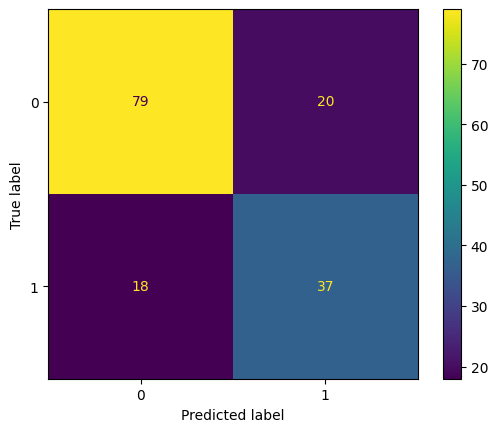

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [81]:
# Plot training accuracy over iterations
iterations = list(range(1, 8))
train_accuracies = []

#iterations = [1, 2, 3, 4, 5, 6]
#train_accuracies = []

In [82]:
# Logistic regression with a loop to track training accuracy
for i in iterations:
    log_reg = LogisticRegression(max_iter=i)
    #log_reg = LogisticRegression(max_iter=i, solver='saga')
    log_reg.fit(X_train_scaled, y_train)
    y_train_pred = log_reg.predict(X_train_scaled)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

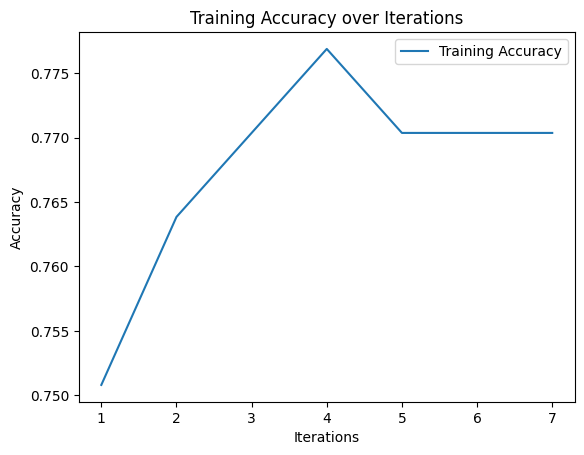

In [83]:
# Plotting training accuracy
plt.plot(iterations, train_accuracies, label='Training Accuracy')
#plt.plot(iterations, train_accuracies, marker='o')
plt.title('Training Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Problem 2

In [84]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [85]:
# Load dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [87]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Train Logistic Regression model without regularization
log_reg = LogisticRegression(max_iter=1000, penalty=None)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [92]:
# Evaluate the model
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

In [95]:
# Results
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9211
Precision: 0.9701
Recall: 0.9028
F1 Score: 0.9353


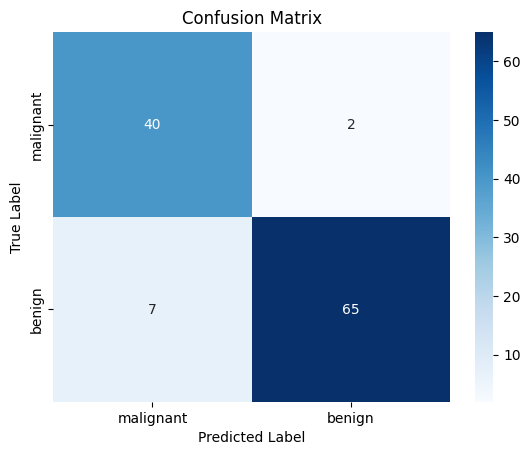

In [96]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [100]:
# Train the Logistic Regression model with regularization (weight penalty)
log_reg_penalty = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)  # L2 Regularization
log_reg_penalty.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [101]:
# Evaluate the regularized model
y_test_pred_penalty = log_reg_penalty.predict(X_test_scaled)

In [105]:
# Results (regularized model)
accuracy_penalty = accuracy_score(y_test, y_test_pred_penalty)
precision_penalty = precision_score(y_test, y_test_pred_penalty)
recall_penalty = recall_score(y_test, y_test_pred_penalty)
f1_penalty = f1_score(y_test, y_test_pred_penalty)

print(f'Regularized Accuracy: {accuracy_penalty:.4f}')
print(f'Regularized Precision: {precision_penalty:.4f}')
print(f'Regularized Recall: {recall_penalty:.4f}')
print(f'Regularized F1 Score: {f1_penalty:.4f}')

Regularized Accuracy: 0.9825
Regularized Precision: 0.9861
Regularized Recall: 0.9861
Regularized F1 Score: 0.9861


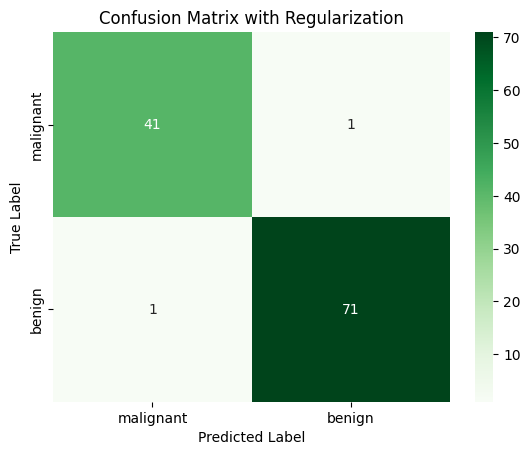

In [106]:
# Confusion matrix (regularized model)
conf_matrix_penalty = confusion_matrix(y_test, y_test_pred_penalty)
sns.heatmap(conf_matrix_penalty, annot=True, fmt="d", cmap="Greens", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Regularized)")
plt.show()


Problem 3

In [107]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [109]:
# Load dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Train Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluate Naive Bayes Model
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

In [113]:
# Results
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Naive Bayes Accuracy: {accuracy:.4f}')
print(f'Naive Bayes Precision: {precision:.4f}')
print(f'Naive Bayes Recall: {recall:.4f}')
print(f'Naive Bayes F1 Score: {f1:.4f}')

Naive Bayes Accuracy: 0.9298
Naive Bayes Precision: 0.9444
Naive Bayes Recall: 0.9444
Naive Bayes F1 Score: 0.9444


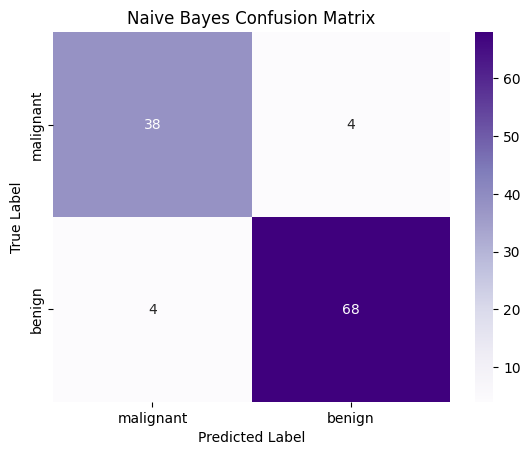

In [114]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Problem 4

In [115]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [116]:
# Load dataset
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# PCA
max_components = X_train_scaled.shape[1]
accuracies = []
precisions = []
recalls = []
f1_scores = []

In [118]:
# Train Logistical Regression
for n_components in range(1, max_components + 1):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train logistic regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train_pca, y_train)

    # Predict on test set
    y_test_pred = log_reg.predict(X_test_pca)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store results
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

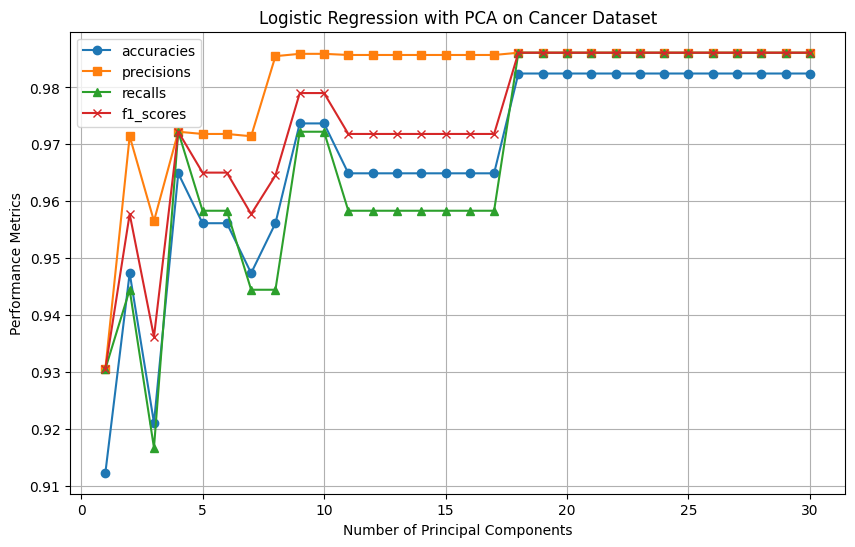

In [123]:
# Results
components = np.arange(1, max_components + 1)
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, label='accuracies', marker='o')
plt.plot(components, precisions, label='precisions', marker='s')
plt.plot(components, recalls, label='recalls', marker='^')
plt.plot(components, f1_scores, label='f1_scores', marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Performance Metrics')
plt.title('Logistic Regression with PCA on Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
# Identify best number of components
best_index = np.argmax(f1_scores)
print(f'Best number of components: {components[best_index]}')
print(f'Best Accuracy: {accuracies[best_index]:.4f}')
print(f'Best Precision: {precisions[best_index]:.4f}')
print(f'Best Recall: {recalls[best_index]:.4f}')
print(f'Best F1 Score: {f1_scores[best_index]:.4f}')

Best number of components: 18
Best Accuracy: 0.9825
Best Precision: 0.9861
Best Recall: 0.9861
Best F1 Score: 0.9861


Problem 5

In [124]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [125]:
# Load dataset
cancer_data = load_breast_cancer()
X = cancer_data.data  # Features
y = cancer_data.target  # Labels (0 = malignant, 1 = benign)

# Split data into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [126]:
# PCA
max_components = X_train_scaled.shape[1]  # The maximum number of components is equal to the number of features
accuracies = []
precisions = []
recalls = []
f1_scores = []

In [128]:
# Train Logistic Regression
for n_components in range(1, max_components + 1):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train logistic regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train_pca, y_train)

    # Predict on test set
    y_test_pred = log_reg.predict(X_test_pca)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store results
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

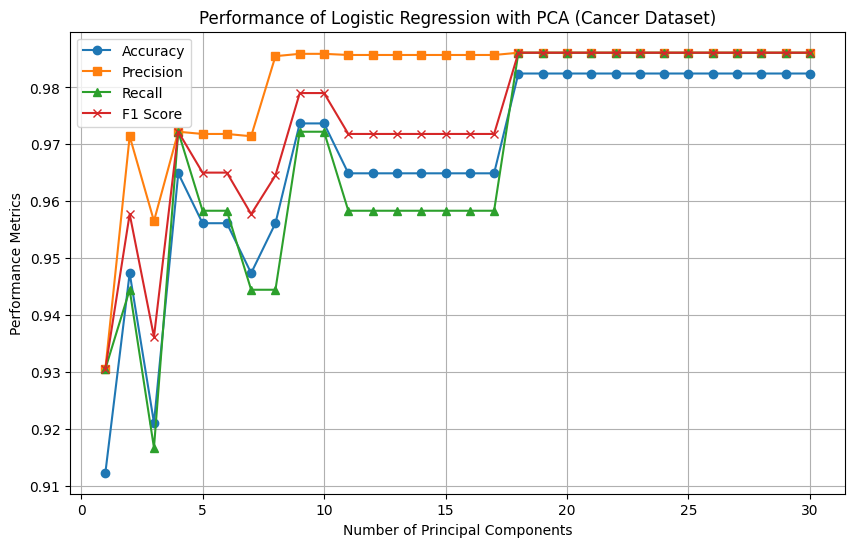

In [131]:
# Results
components = np.arange(1, max_components + 1)
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, label='Accuracy', marker='o')
plt.plot(components, precisions, label='Precision', marker='s')
plt.plot(components, recalls, label='Recall', marker='^')
plt.plot(components, f1_scores, label='F1 Score', marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Performance Metrics')
plt.title('Performance of Logistic Regression with PCA (Cancer Dataset)')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
# Identify best number of components
best_index = np.argmax(f1_scores)
print(f'Best number of components: {components[best_index]}')
print(f'Best Accuracy: {accuracies[best_index]:.4f}')
print(f'Best Precision: {precisions[best_index]:.4f}')
print(f'Best Recall: {recalls[best_index]:.4f}')
print(f'Best F1 Score: {f1_scores[best_index]:.4f}')

Best number of components: 18
Best Accuracy: 0.9825
Best Precision: 0.9861
Best Recall: 0.9861
Best F1 Score: 0.9861
